In [ ]:
# PCA (principal component analysys:주성분분석)

# - 차원축소 기법
# - 주성분 : 데이터의 분산(흩어짐)의 크기가 가장 큰 방향의 직선 - 데이터의 특이성을 가장 잘 나타내는 선
# - 주성분을 기준으로 데이터를 투사 => 한 차원이 축소
# - 새로운 주성분에 데이터를 투사 => 한 차원 축소
# - 주성분은 차원의 수만큼 존재
# - 최종적인 데이터의 차원수 만큰 주성분을 이용

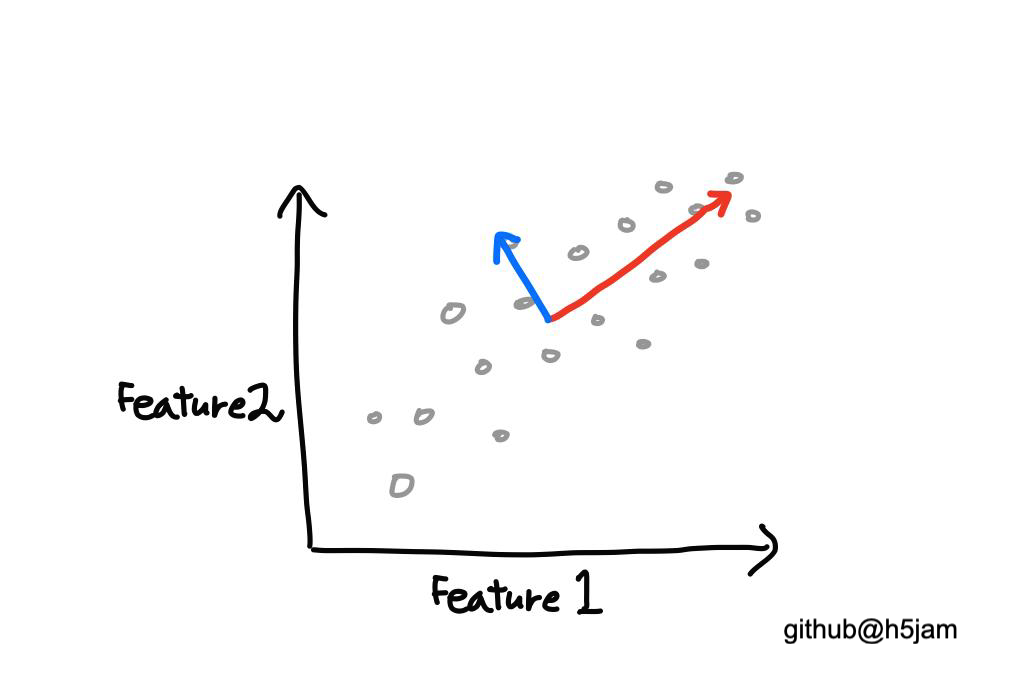

In [2]:
from IPython.display import Image
Image('pca1.png')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [5]:
fruits[0, :, :]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

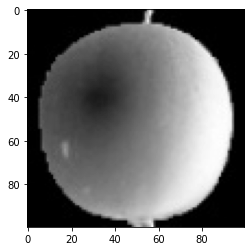

In [8]:
plt.imshow(fruits[0, :, :], cmap='gray')

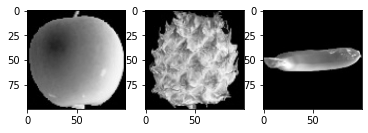

In [9]:
fig, axs = plt.subplots(1,3)
axs[0].imshow(fruits[50, :, :], cmap='gray')
axs[1].imshow(fruits[150, :, :], cmap='gray')
axs[2].imshow(fruits[250, :, :], cmap='gray')
plt.show()

In [10]:
fruits.shape

(300, 100, 100)

In [11]:
fruits[0].shape

(100, 100)

In [12]:
fruits[0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [14]:
fruits[0].reshape(-1, 100*100)

array([[1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [15]:
fruites_2d = fruits.reshape(-1, 100*100)

In [16]:
fruites_2d.shape

(300, 10000)

In [19]:
label = ['apple']*100 + ['pineapple']*100 + ['banana']*100

In [21]:
len(label)

300

In [23]:
x = fruites_2d
y = label

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=111)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
x[0]

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [34]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree.score(x_test, y_test)

0.95

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)  # 10000차원을 50차원으로 축소 : 50개의 주성분을 기준으로 데이터를 투사
pca.fit(fruites_2d)

PCA(n_components=50)

In [37]:
fruites_pca = pca.transform(fruites_2d)

In [39]:
fruites_pca.shape

(300, 50)

In [41]:
from sklearn.model_selection import train_test_split
pca_x_train, pca_x_test, y_train, y_test = train_test_split(fruites_pca,y, test_size=0.2, random_state=111)

In [42]:
tree = DecisionTreeClassifier()
tree.fit(pca_x_train, y_train)
tree.score(pca_x_test, y_test)

1.0

In [43]:
# 50개의 주성분이 생성 - 각각의 주성분에 데이터를 투사하면서 차원을 축소..

In [45]:
pca.components_.shape

(50, 10000)

In [46]:
# 축소된 데이터를 원본의 차원으로 복원

In [47]:
fruits_inverse = pca.inverse_transform(fruites_pca)
fruits_inverse.shape

(300, 10000)

In [ ]:
# 각각의 pca가 어느정도 데이터의 분산을 설명을 하는지..
# 데이터의 분산(흩어짐) : 데이터의 다름을 나타내는 수준.. 데이터들의 이질적 특이성..

In [49]:
pca.explained_variance_ratio_  # 

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511202, 0.00486383, 0.00480347,
       0.00447834, 0.00437315, 0.00408042, 0.00389473, 0.0037242 ,
       0.00359262, 0.00331471, 0.00317842, 0.00304324, 0.00303774,
       0.00288802, 0.00275778, 0.0026491 , 0.002559  , 0.00252133,
       0.0024687 , 0.00239738, 0.00230815, 0.00221793, 0.00216402,
       0.00213668, 0.00195547, 0.00192262, 0.00190159, 0.00185328,
       0.00178129, 0.00173328, 0.00168959, 0.0016278 , 0.00161016])

In [50]:
np.sum(pca.explained_variance_ratio_)

0.921520988554302

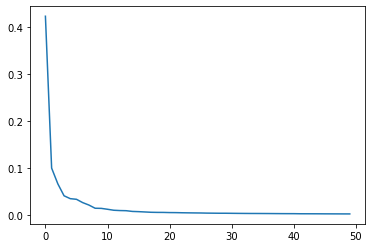

In [51]:
plt.plot(pca.explained_variance_ratio_)
# pca 10개정도에서 대부분의 데이터의 특이성을 설명..

In [52]:
pca = PCA(n_components=0.5)  # 데이터의 분산의 50%를 설명하는 수준의 차원.
pca.fit(fruites_2d)

PCA(n_components=0.5)

In [53]:
print(pca.n_components_)     # 주성분이 2개 정도이면 데이터의 분산의 50%를 설명.. : 2차원으로 축소시

2


In [54]:
fruites_2d = pca.transform(fruites_2d)
fruites_2d.shape

(300, 2)

In [55]:
from sklearn.model_selection import train_test_split
pca_x_train, pca_x_test, y_train, y_test = train_test_split(fruites_2d, y, test_size=0.2, random_state=111)

In [56]:
tree = DecisionTreeClassifier()
tree.fit(pca_x_train, y_train)
tree.score(pca_x_test, y_test)

1.0